In [1]:
from numpy.random import randn
from numpy import zeros, ones
from math import sqrt
n = 1000
d = 50
cluster_distance = 3.0
noise_level = 0.5
vectors = zeros((n,d))
for i in range(n):
    vectors[i,i%d] = cluster_distance
vectors += noise_level*randn(n,d)/sqrt(d)

In [2]:
from densitySketch import DensitySketch
ds = DensitySketch(vectors)

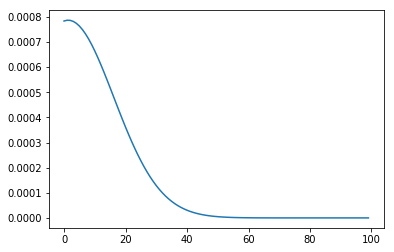

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

v1 = zeros(d); v1[0] = 1.0
v2 = 5*ones(d)/sqrt(d)

m=100
densities = zeros(m)
for i in range(m):
    alpha = float(i)/(m-1)
    v = (1.0-alpha)*v1 + alpha*v2
    densities[i] = ds.density(v)

plt.plot(densities)

In [4]:
from numpy import array
from random import sample
ds_all = DensitySketch(vectors)
vectors_coreset = ds_all.coreset()
ds_coreset = DensitySketch(vectors_coreset)
vectors_sample = array(sample(list(vectors),len(vectors_coreset)))
ds_sample = DensitySketch(vectors_sample)

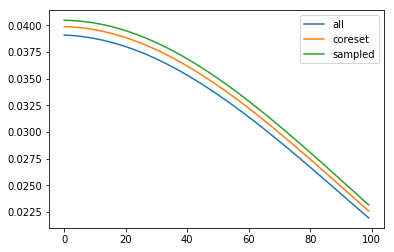

In [5]:
from math import sqrt
from numpy import linspace

m=100
evals = zeros((m,3))

v1 = zeros(d); v1[0] = cluster_distance
v2 = cluster_distance*ones(d)/sqrt(d)
for i, alpha in enumerate(linspace(0.0,0.2,100)):
    v = (1.0-alpha)*v1 + alpha*v2
    evals[i,0] = ds_all.density(v)
    evals[i,1] = ds_coreset.density(v)
    evals[i,2] = ds_sample.density(v)
    

plt.plot(evals[:,0], label='all')
plt.plot(evals[:,1], label='coreset')
plt.plot(evals[:,2], label='sampled')
plt.legend()